<h1><center><font size="6">Predicting Credit Card Fraud</font></center></h1>

<h2><center><font size="4">Dataset used:Kaggle </font></center></h2>

<h3><center><font size="4"> https://www.kaggle.com/mlg-ulb/creditcardfraud </font></center></h2>

In [1]:
%%html
<img src = '../img/woman_holding_cc.jpg'>

<a id="top"></a> <br>
## Table of  Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data](#3)

1. [Data Insights](#4)
    1. [Data Structure](#41)
    1. [Summary Stats](#42)
    1. [Unique Value Checking](#43)
    1. [Identifying 'Bad Columns'](#44)

1. [Data Cleansing](#5)
    1. [Data Reduction](#51)
        1. [Dropping Bad Columns](#511)
        1. [Null Value Removal](#512)
    1. [Data Type Conversion](#52)

1. [Modelling Workflow](#6)
    1. [Data Prep](#61)
        1. [Categorical to Ordinal Encoding](#611)
        1. [Normalizing Numerical Variables](#612)
        1. [Feature Target Split](#613)
        1. [Train-Test Split](#614)
    1. [Estimate of Baseline Accuracy - Class Distributions](#62)
    1. [Predictive Modelling](#63)
        1. [ML Model Fitting](#631)
        1. [Model Performance Metrics Report](#632)
    1. [Performance Metrics for Imbalanced Datasets](#64)
    
1. [References](#7)

# <a id='1'>Introduction</a>  

Assume you work for a financial institution that issues credit cards to customers. Once the credit card is in the hands of the customers, it is important that the customer is alerted and the card possibly blocked upon the detection of fraudulent transactions. In this dataset, we deal with anonymized data from a Kaggle competition 

"The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."

## <a id='2'>Initialization</a>  


### <a id='21'>Load Packages</a>  

Load the minimum number of packages to get started and add more as we go along

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.


### <a id='22'>Define Metadata</a>  

In [3]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'Class'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['Non-Fraud', 'Fraud']

input_file_name = 'creditcard.csv'

intermediate_data_path = '../intermediate data/'

output_df_file_name = 'week1_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200410'

In [4]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['creditcard.csv']


## <a id='3'>Load Data</a>  

In [5]:
df = pd.read_csv('../input/' + input_file_name)
# The index column is based on the Data Mapping provided by Kaggle
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
221834,142720.0,1.860027,-0.526218,-0.710877,-0.080111,0.367518,1.678836,-0.920015,0.659829,1.053409,...,-0.044980,-0.005717,0.449997,-0.799658,-0.658865,-0.541617,0.072600,-0.051454,1.18,0
125129,77544.0,-0.767007,2.673384,-3.784444,-0.076654,3.530316,2.353165,0.924882,0.145660,1.614851,...,-0.646932,-0.533034,0.005024,0.621216,-0.000270,-0.489935,0.151985,-0.687958,0.89,0
279743,169065.0,2.027572,-0.175412,-1.198171,0.237027,0.009658,-0.717744,0.044120,-0.135522,0.392931,...,-0.261056,-0.697971,0.289061,-0.351900,-0.308602,0.199518,-0.080217,-0.073380,8.99,0
280808,169767.0,2.020059,0.061732,-1.618229,0.352181,0.316534,-0.681594,0.035005,-0.059003,0.334153,...,-0.309683,-0.858120,0.360214,0.649397,-0.338057,0.145161,-0.070965,-0.040478,0.89,0
219561,141773.0,-0.843679,0.539618,-0.118960,-0.560663,1.717790,-0.880161,0.538008,-0.005112,-0.389293,...,-0.227561,-0.489650,-0.017141,0.642491,-0.851373,0.047097,0.349657,0.249082,4.56,0


Lets check the head & tail to make sure there is nothing going on

In [6]:
df.head(3)
# What you are checking here is whether there are some unwanted headers from teh input file that 
# can corrupt our data
# If found, either open the file and manually delete it or only load the relevant columns

# You can see the Target column is actually upfront
# There are 120 features even before we combine the other datasets with this

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
df.tail(3)
# similar logic here

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


No trouble with loading the data. Both the head and tail are clean

## <a id=4 > Data Insights

### <a id='41'>Data Structure</a> 

In [8]:
# Lets see the data structure
df.info()
# This will give you an indication of how many rows and columns are present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Seems the data has been preprocessed to the point where all the variables are being recognized as floats

### <a id='42'>Summary Stats</a> 

In [9]:
df.describe()
# check out each column's summary statistics to and infer and have follow on visualizations 
# Note that only the numerical columns will be described. Make sure to ignore non-numerical columns
# like 'customer_id' before you describe
# Also you will want to exclude the integer columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### <a id='43'>Unique Value Checking</a> 

In [10]:
for column in df.columns:
    print(column, len(df[column].unique()))

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


In [11]:
# Except the Amount column, everything else has the same number of unique values (275663) 
#which for some reason is less than the lenght of the dataframe
# My suspicion is that there are duplicate rows

### <a id='44'>Identifying Bad Columns</a> 

In [12]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 0 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


## <a id='5'>Data Cleansing</a> 

#### <a id='511'>Dropping Bad Columns</a> 

In [13]:
# In this dataset, we dont have any duplicated columns or those which have near-constant values
# But if they do show up, you should go ahead and delete them to reduce overfitting

print('Before dropping irrelevant features and duplicated columns,')
print('{} number of columns were present'.format(len(df.columns)))

for drop_column_list in [constant_numeric_col_list, constant_non_numeric_col_list, duplicate_col_list]:
    df.drop(drop_column_list, axis=1, inplace=True)

print('After dropping the above, ')
print('{} number of columns are present'.format(len(df.columns)))

# No need to change this code because we are always going to drop these 3 types of columns

Before dropping irrelevant features and duplicated columns,
31 number of columns were present
After dropping the above, 
31 number of columns are present


In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### <a id='512'>Null Value Removal</a> 

In [15]:
df.drop(null_col_list, axis=1, inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### <a id='53'>Data Type Conversion</a> 

No conversion necessary because no special characters seen

## <a id = 6 > Modelling Workflow

### <a id = 61 > Data Prep 

##### <a id='611'>Categorical to Ordinal encoding</a> 

No need to do any encoding because there are no Object columns in our dataset

#### <a id = 612 > Normalizing numerical variables

Now that we have numerical features, can we feed it directly into a tree based model like Random Forest? Ye,s even without scaling or normalizing. Scaling has the effect of squeezing all data range into a tight range but is not required for Tree-based ML models

#### <a id='613'>Feature - Target Split</a> 

In [16]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

#### <a id='614'>Train-Test Split</a> 

In [17]:
# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

### <a id='62'>Estimate of baseline accuracy - Class Distributions </a> 

In [18]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of Negative class is {} %'.format(
    round(df[target_class_name].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df[target_class_name].value_counts()[1]/len(df) * 100,3)))

# A dumb model that predicts everything as being 0, will generate a baseline accuracy of 99.8%

Percentage of Negative class is 99.827 %
Percentage of Positive class is 0.173 %


0    284315
1       492
Name: Class, dtype: int64

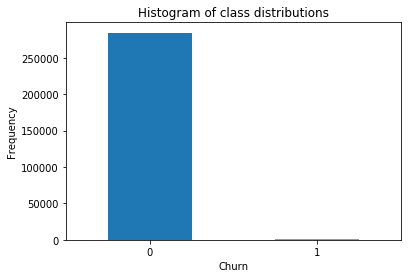

In [19]:
plt.figure(figsize=(6,4))
pd.value_counts(df[target_class_name]).plot.bar()
plt.title('Histogram of class distributions')
plt.xlabel('Churn')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
df[target_class_name].value_counts()

# Its not too balanced, it could be made a lot more balanced but for now proceed anyway

The baseline accuracy to beat is 99.8%

What about the other metrics like Precision, Recall and F1 score?
They would all be 0% for the positive class

### <a id='63'>Predictive Modelling</a> 

#### <a id='631'>ML Model Fitting</a> 

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### <a id='632'>Model Performance Metrics</a> 

Has a Train accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    227451
       Fraud       1.00      0.96      0.98       394

   micro avg       1.00      1.00      1.00    227845
   macro avg       1.00      0.98      0.99    227845
weighted avg       1.00      1.00      1.00    227845

The ROC AUC Score on Train set is 1.0
Confusion matrix, without normalization
[[227451      0]
 [    16    378]]


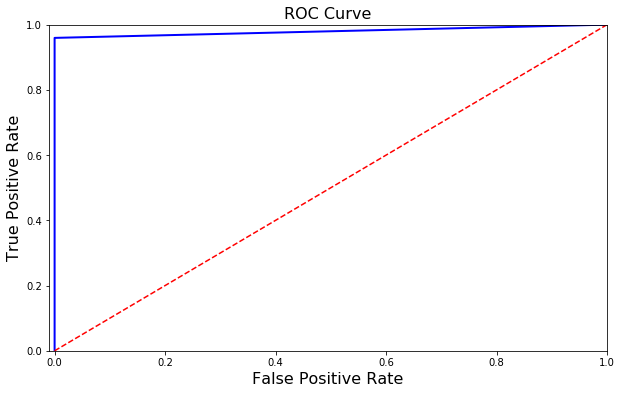

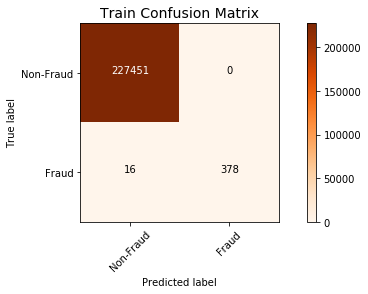

In [21]:
from helper_functions_comprehensive import custom_classification_metrics_function
custom_classification_metrics_function(X_train, y_train, labels, classifier, data_type='Train')

Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.80      0.86        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.95
Confusion matrix, without normalization
[[56859     5]
 [   20    78]]


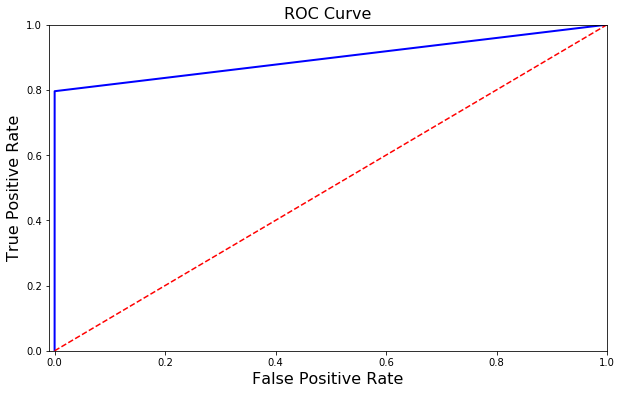

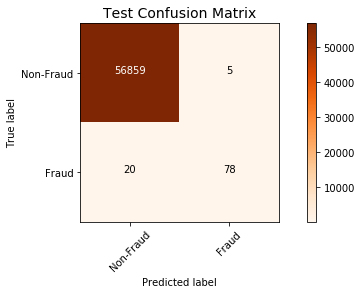

In [22]:
custom_classification_metrics_function(X_test, y_test, labels, classifier, data_type='Test')

In [23]:
# Its not too bad, its picking up most of the Fraud cases. Its a little bit too lenient causing 20 False negatives
# The classification report shows that the F1 score for the minority positive class is around 86%

### <a id =64 > Performance Metrics for Imbalanced Datasets

The idea here is to come up with a metric that will allow us to compare performance across different models.
This article describes why ROC AUC and F1 score are not the right metrics for imbalanced datasets
https://towardsdatascience.com/selecting-the-right-metric-for-skewed-classification-problems-6e0a4a6167a7

The F1 score is sensitive to imbalance but its unable to differentiate between a good recall or a good precision
due to the symmetrical nature of the formula 
F1 = 2*(Precision * Recall)/(Precision + Recall)

In [49]:
# April 15th 2020
def precision_at_recall_threshold(y_test, predicted_proba, recall_threshold=0.85):
    '''
    Args: The true labels, predicted probabilities and the threshold for which recall needs to be computed
    Logic: Using the precision recall curve method from sklearn, the precision, recall and threshold are calculated
    Returns: "What was the precision when recall was just above the recall_threshold?" 
    
    '''
        
    precision, recall, _ = precision_recall_curve(y_test, predicted_proba)
    
    return precision[recall>recall_threshold][-1]

In [50]:
from helper_functions_comprehensive import classification_report, confusion_matrix, plot_confusion_matrix_function
from sklearn.metrics import precision_recall_curve

predicted_proba = classifier.predict_proba(X_test)[:,1]
precision_at_recall_threshold(y_test, predicted_proba, recall_threshold=0.85)


0.8842105263157894

This precision number is what we can use to compare model performance in the absence of business guidance on the relative value of TP, FP, FN and TN

In [ ]:
# In the next week we are going to try and improve model performance by rebalancing the skewed dataset

## <a id =7 > References